<a href="https://colab.research.google.com/github/Sa96/sanjay/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
admission=pd.read_csv('/content/Admission_Predict.csv')

In [3]:
admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


In [4]:
admission['Research'] = admission['Research'].astype(object)

admission= admission.drop('Serial No.', axis = 1)
df_target = admission['Chance of Admit']
df_feature = admission.drop('Chance of Admit', axis = 1)
df_num = df_feature.select_dtypes(include=[np.number])
df_cat= df_feature.select_dtypes(exclude=[np.number])


In [5]:
df_num.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [6]:
df_cat.columns

Index(['Research'], dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler
num_scaled=StandardScaler().fit_transform(df_num)

In [8]:
num_scale_dataframe=pd.DataFrame(num_scaled,columns=df_num.columns)

In [9]:
num_scale_dataframe.head(20)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029
5,1.151249,1.252078,1.674257,1.093864,-0.504260,1.244310
6,0.365860,0.262293,-0.076600,-0.397769,0.610127,-0.669819
7,-0.768590,-1.057420,-0.952029,-0.397769,0.610127,-1.173537
8,-1.292182,-0.892456,-1.827457,-1.392191,-2.175842,-1.005631
9,0.540391,0.097329,-0.076600,0.099442,-0.504260,0.001805


In [10]:
df_cat.columns

Index(['Research'], dtype='object')

In [11]:
df_dummy=pd.get_dummies(data=df_cat,drop_first=True)

In [12]:
df_concat=pd.concat([num_scale_dataframe,df_dummy],axis=1)

In [13]:
df_concat.head(20)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0
5,1.151249,1.252078,1.674257,1.093864,-0.504260,1.244310,1
6,0.365860,0.262293,-0.076600,-0.397769,0.610127,-0.669819,1
7,-0.768590,-1.057420,-0.952029,-0.397769,0.610127,-1.173537,0
8,-1.292182,-0.892456,-1.827457,-1.392191,-2.175842,-1.005631,0
9,0.540391,0.097329,-0.076600,0.099442,-0.504260,0.001805,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_concat, df_target, random_state = 10, test_size = 0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [16]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
Y_predict=dtc.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [19]:
confusion_matrix(y_test,Y_predict)

array([[31, 11],
       [ 8, 30]])

In [20]:
accuracy_score(y_test,Y_predict)

0.7625

In [21]:
recall_score(y_test,Y_predict)

0.7894736842105263

In [22]:
precision_score(y_test,Y_predict)

0.7317073170731707

In [23]:
f1_score(y_test,Y_predict)

0.7594936708860759

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77        42
           1       0.73      0.79      0.76        38

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [26]:
dtc_entropy=DecisionTreeClassifier(criterion='entropy',random_state=10)

In [27]:
dtc_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [28]:
y_entropy=dtc_entropy.predict(X_test)

In [29]:
confusion_matrix(y_test,y_entropy)

array([[33,  9],
       [ 6, 32]])

In [30]:
accuracy_score(y_test,y_entropy)

0.8125

In [31]:
print(classification_report(y_test,y_entropy))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.78      0.84      0.81        38

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



In [32]:
from IPython.display import Image
from sklearn import tree
from os import system
import pydotplus

In [33]:
labels=X_train.columns

In [34]:
df_file=open('dtc.dot','w')

In [35]:
dot_data=tree.export_graphviz(dtc,out_file=df_file,feature_names=labels,class_names=['0','1'],filled=True,rounded=True)

In [36]:
df_file.close()

In [53]:
system("dot -Tpng dtc.dot -o dtc.png")

0

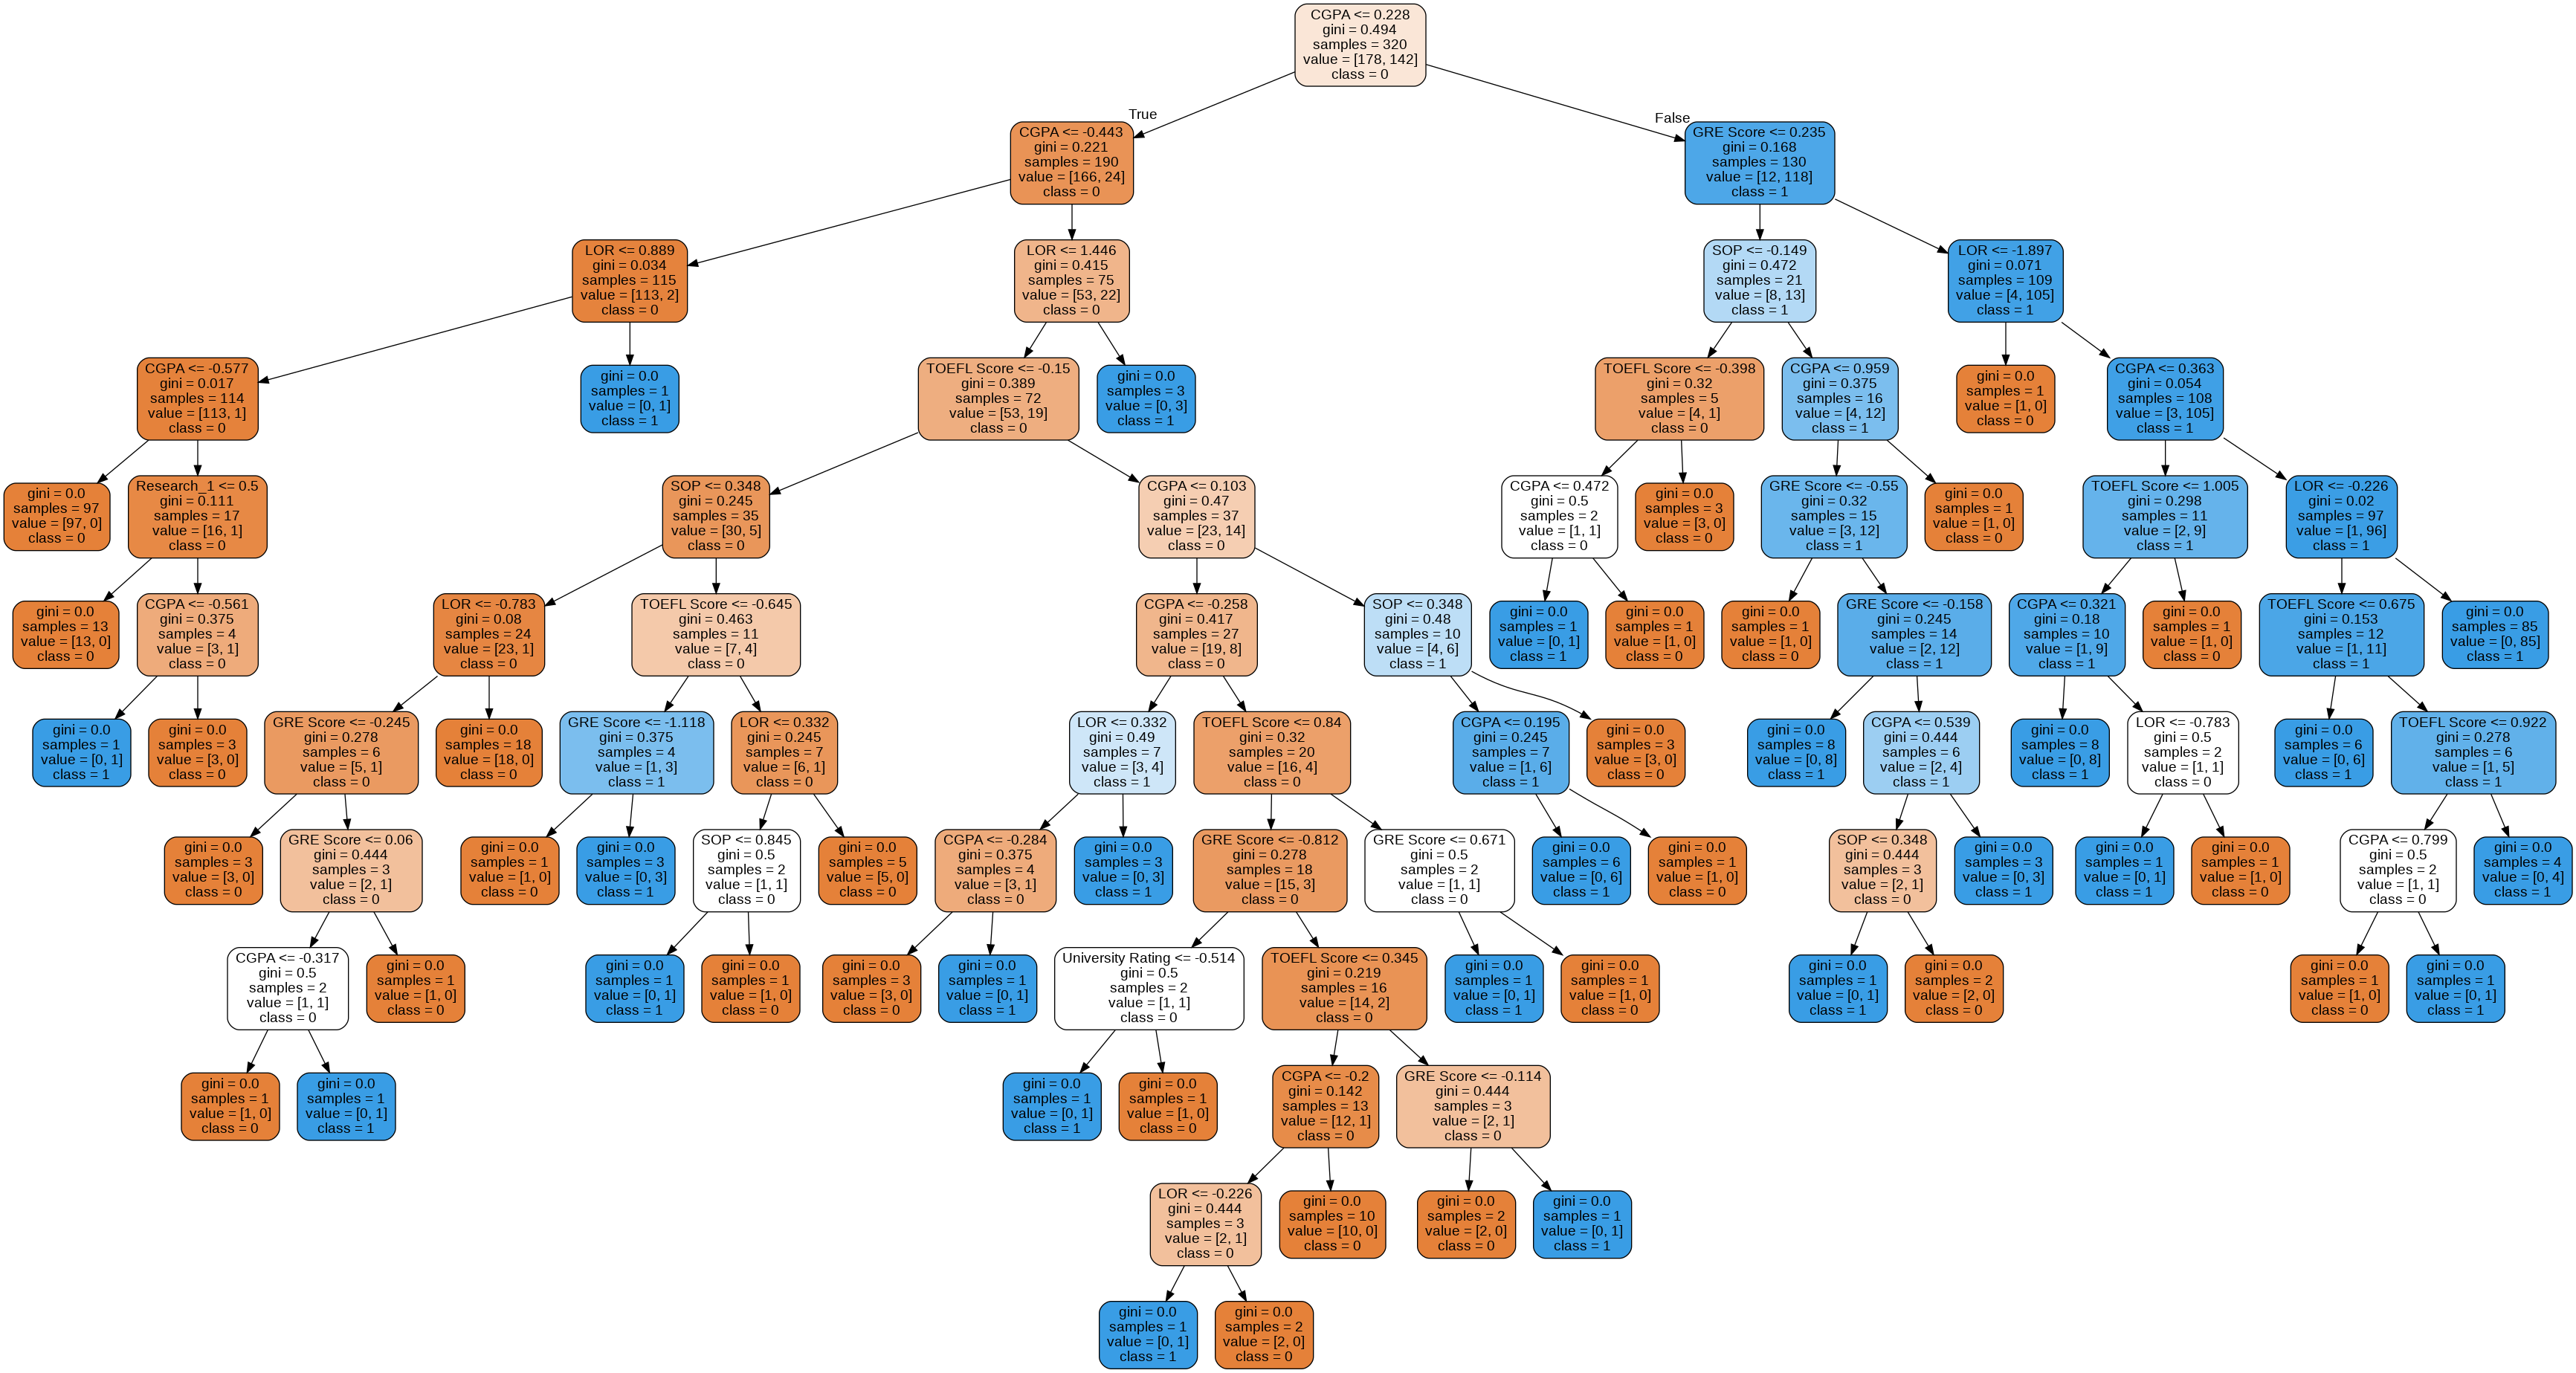

In [54]:
Image('dtc.png')

In [40]:
dt5=DecisionTreeClassifier(max_depth=5,random_state=10)

In [41]:
dt5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [42]:
Y_predict_5=dt5.predict(X_test)

In [43]:
print(classification_report(y_test,Y_predict_5))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [44]:
dtc.feature_importances_

array([0.07157313, 0.04746691, 0.00633012, 0.05879198, 0.07795168,
       0.73546585, 0.00242034])

In [45]:
importance=pd.DataFrame({'Importance':dtc.feature_importances_,'Features':df_concat.columns})

In [46]:
importance

,Importance,Features
0,0.071573,GRE Score
1,0.047467,TOEFL Score
2,0.006330,University Rating
3,0.058792,SOP
4,0.077952,LOR
5,0.735466,CGPA
6,0.002420,Research_1


In [47]:
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV

In [48]:
parameters={'max_depth':range(2,10),'criterion':['entropy','gini']}

In [49]:
dtree=DecisionTreeClassifier(random_state=100)

In [50]:
tree=GridSearchCV(dtree,parameters,cv=5,scoring='accuracy')

In [51]:
tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                    

In [52]:
tree.best_params_

{'criterion': 'entropy', 'max_depth': 2}